In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load dataset (Replace 'coal_data.csv' with your actual file path)
coal_data = pd.read_csv("C:/Users/Admin/coal_dataset.csv")
coal_data

,srcStateName,srcYear,Types of coal,Coal Consuming Sectors,Coal Consumed,YearCode,Year
0,PUNJAB,2011,RAW COAL,POWER (UTILITY),12.545,2011,"Financial Year (Apr - Mar), 2011"
1,ANDHRA PRADESH,2011,RAW COAL,POWER (CAPTIVE),3.363,2011,"Financial Year (Apr - Mar), 2011"
2,ASSAM,2011,RAW COAL,PULP & PAPER,0.095,2011,"Financial Year (Apr - Mar), 2011"
3,PUNJAB,2011,RAW COAL,FERTILISERS,1.111,2011,"Financial Year (Apr - Mar), 2011"
4,DELHI,2011,WASHED COAL,POWER (UTILITY),1.599,2011,"Financial Year (Apr - Mar), 2011"
...,...,...,...,...,...,...,...
1622,WEST BENGAL,2020,WASHED COAL,METALLURGICAL USE- DIRECT FEED,0.169,2020,"Financial Year (Apr - Mar), 2020"
1623,MAHARASHTRA,2020,WASHED COAL,POWER (CAPTIVE),0.032,2020,"Financial Year (Apr - Mar), 2020"
1624,TAMILNADU,2020,LIGNITE,BRICKS,0.011,2020,"Financial Year (Apr - Mar), 2020"
1625,ODISHA,2020,RAW COAL,COLLIERY OWN - CONSUMPTION,0.002,2020,"Financial Year (Apr - Mar), 2020"


In [10]:
# Data Cleaning
print("Initial Data Overview:")
print(coal_data.info())
print(coal_data.head())
print(coal_data.describe())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   srcStateName            1627 non-null   object 
 1   srcYear                 1627 non-null   int64  
 2   Types of coal           1627 non-null   object 
 3   Coal Consuming Sectors  1627 non-null   object 
 4   Coal Consumed           1627 non-null   float64
 5   YearCode                1627 non-null   int64  
 6   Year                    1627 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 89.1+ KB
None
     srcStateName  srcYear Types of coal Coal Consuming Sectors  \
0          PUNJAB     2011      RAW COAL        POWER (UTILITY)   
1  ANDHRA PRADESH     2011      RAW COAL        POWER (CAPTIVE)   
2           ASSAM     2011      RAW COAL           PULP & PAPER   
3          PUNJAB     2011      RAW COAL            FERTIL

In [11]:
print(coal_data.isnull().sum())

srcStateName              0
srcYear                   0
Types of coal             0
Coal Consuming Sectors    0
Coal Consumed             0
YearCode                  0
Year                      0
dtype: int64


In [24]:
# Debugging checks before aggregation
print("\nColumn names:", coal_data.columns)
print("\nDataset shape after cleaning:", coal_data.shape)


Column names: Index(['srcStateName', 'srcYear', 'Types of coal', 'Coal Consuming Sectors',
       'Coal Consumed', 'YearCode', 'Year'],
      dtype='object')

Dataset shape after cleaning: (1627, 7)



Sector-wise Coal Consumption:
            Coal Consuming Sectors  Coal Consumed
10                 POWER (UTILITY)       4264.163
9                  POWER (CAPTIVE)       1274.051
12                     SPONGE IRON        121.712
1                           CEMENT        106.512
7      METALLURGICAL USE- COKERIES         48.302
11                    PULP & PAPER         25.988
14               TEXTILES & RAYONS         22.869
6                      FERTILISERS         22.750
8   METALLURGICAL USE- DIRECT FEED         16.085
0                           BRICKS         13.436
13                 STEEL (BOILERS)          7.848
2                         CHEMICAL          7.677
3                         COKERIES          3.149
4       COLLIERY OWN - CONSUMPTION          1.661
5                   COLLIERY STAFF          0.002


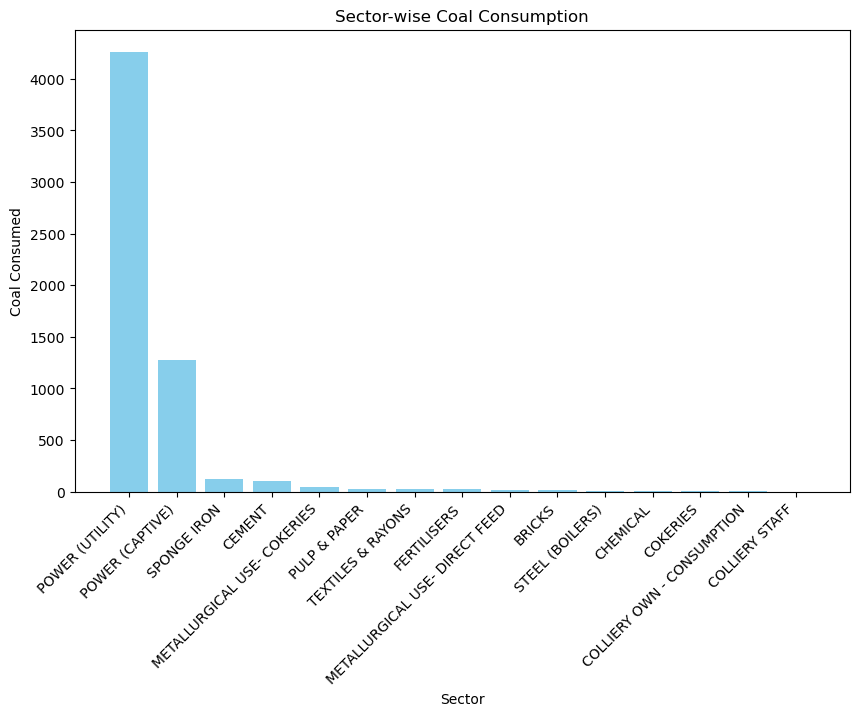

In [31]:
# Aggregate coal consumption by sector
sector_coal_consumption = coal_data.groupby('Coal Consuming Sectors', as_index=False)['Coal Consumed'].sum()

# Sort sectors by highest consumption
sector_coal_consumption = sector_coal_consumption.sort_values(by='Coal Consumed', ascending=False)

# Display results
print("\nSector-wise Coal Consumption:")
print(sector_coal_consumption)

# Visualization: Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(sector_coal_consumption['Coal Consuming Sectors'], sector_coal_consumption['Coal Consumed'], color='skyblue')
plt.title('Sector-wise Coal Consumption')
plt.xlabel('Sector')
plt.ylabel('Coal Consumed')
plt.xticks(rotation=45, ha='right')
plt.show()



Coal Type Preferences per Sector:
            Coal Consuming Sectors Types of coal  Coal Consumed
2                           BRICKS      RAW COAL          7.079
0                           BRICKS       LIGNITE          6.353
3                           BRICKS   WASHED COAL          0.003
1                           BRICKS     MIDDLINGS          0.001
6                           CEMENT      RAW COAL         95.825
4                           CEMENT       LIGNITE          9.641
7                           CEMENT   WASHED COAL          1.042
5                           CEMENT     MIDDLINGS          0.004
8                         CHEMICAL       LIGNITE          4.353
9                         CHEMICAL      RAW COAL          3.324
11                        COKERIES   WASHED COAL          2.590
10                        COKERIES      RAW COAL          0.559
12      COLLIERY OWN - CONSUMPTION      RAW COAL          1.660
13      COLLIERY OWN - CONSUMPTION   WASHED COAL          0.001
14   

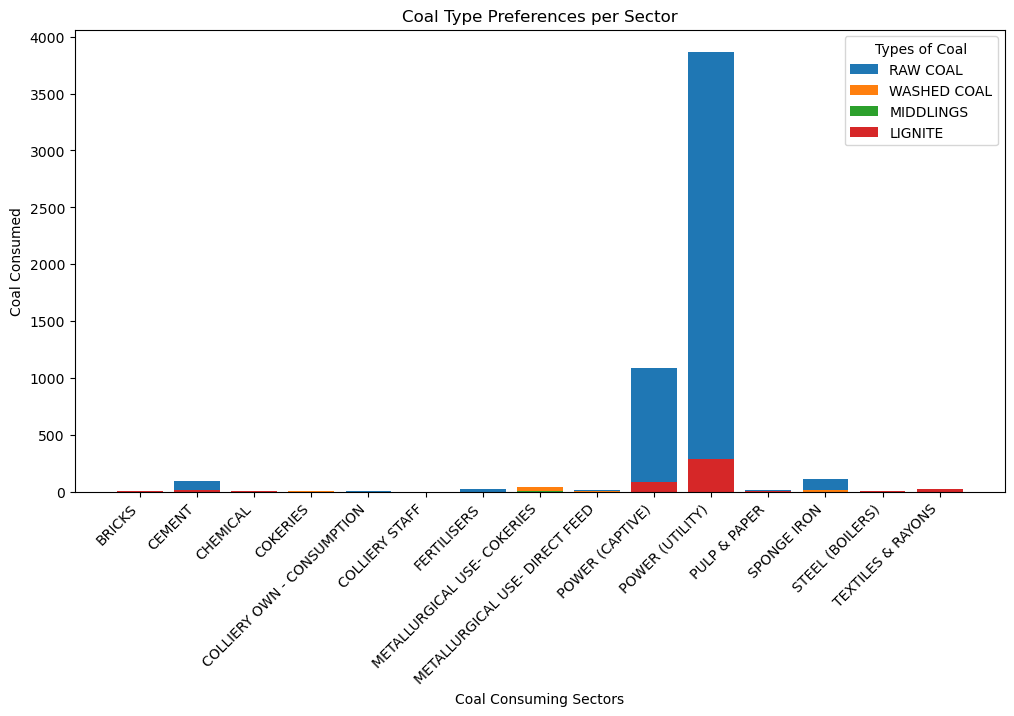

In [32]:
# Aggregate coal consumption by sector and coal type
coal_type_sector = coal_data.groupby(['Coal Consuming Sectors', 'Types of coal'], as_index=False)['Coal Consumed'].sum()

# Sort values for better readability
coal_type_sector = coal_type_sector.sort_values(by=['Coal Consuming Sectors', 'Coal Consumed'], ascending=[True, False])

# Display results
print("\nCoal Type Preferences per Sector:")
print(coal_type_sector)

# Visualization: Stacked Bar Chart
plt.figure(figsize=(12, 6))
for coal_type in coal_data['Types of coal'].unique():
    subset = coal_type_sector[coal_type_sector['Types of coal'] == coal_type]
    plt.bar(subset['Coal Consuming Sectors'], subset['Coal Consumed'], label=coal_type)

plt.title('Coal Type Preferences per Sector')
plt.xlabel('Coal Consuming Sectors')
plt.ylabel('Coal Consumed')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Types of Coal")
plt.show()


Sector-wise Dependency Ranking:
            Coal Consuming Sectors  Coal Consumed  Rank
10                 POWER (UTILITY)       4264.163   1.0
9                  POWER (CAPTIVE)       1274.051   2.0
12                     SPONGE IRON        121.712   3.0
1                           CEMENT        106.512   4.0
7      METALLURGICAL USE- COKERIES         48.302   5.0
11                    PULP & PAPER         25.988   6.0
14               TEXTILES & RAYONS         22.869   7.0
6                      FERTILISERS         22.750   8.0
8   METALLURGICAL USE- DIRECT FEED         16.085   9.0
0                           BRICKS         13.436  10.0
13                 STEEL (BOILERS)          7.848  11.0
2                         CHEMICAL          7.677  12.0
3                         COKERIES          3.149  13.0
4       COLLIERY OWN - CONSUMPTION          1.661  14.0
5                   COLLIERY STAFF          0.002  15.0


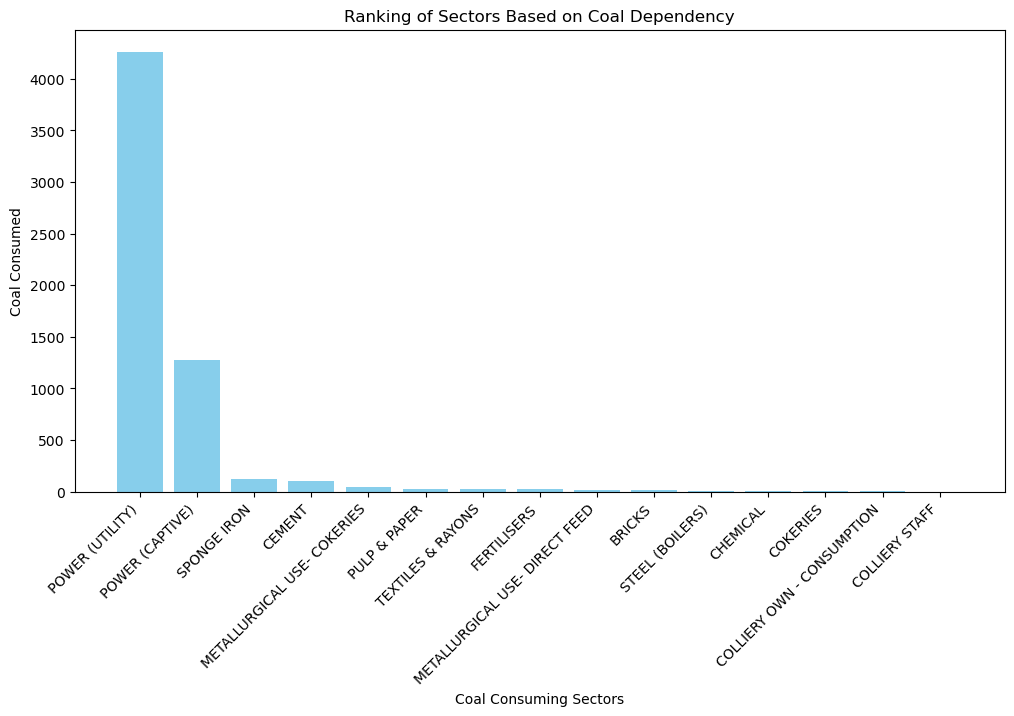

In [33]:
# Rank sectors based on total coal consumption
sector_coal_consumption = coal_data.groupby('Coal Consuming Sectors', as_index=False)['Coal Consumed'].sum()

# Sort in descending order and assign ranks
sector_coal_consumption = sector_coal_consumption.sort_values(by='Coal Consumed', ascending=False)
sector_coal_consumption['Rank'] = sector_coal_consumption['Coal Consumed'].rank(ascending=False, method='dense')

# Display results
print("\nSector-wise Dependency Ranking:")
print(sector_coal_consumption[['Coal Consuming Sectors', 'Coal Consumed', 'Rank']])

# Visualization: Bar Chart for sector ranking
plt.figure(figsize=(12, 6))
plt.bar(sector_coal_consumption['Coal Consuming Sectors'], sector_coal_consumption['Coal Consumed'], color='skyblue')
plt.title('Ranking of Sectors Based on Coal Dependency')
plt.xlabel('Coal Consuming Sectors')
plt.ylabel('Coal Consumed')
plt.xticks(rotation=45, ha='right')
plt.show()